<a href="https://colab.research.google.com/github/sush2004/Python/blob/main/ML_CA2_Regression_10550452.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
import pandas

In [48]:
#calling classes
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from numpy import set_printoptions

#Loading dataset
hate_crime = pd.read_csv("hate_crimes.csv")

In [6]:
print(hate_crime.head(5))
print(hate_crime.shape)

        state  ...  avg_hatecrimes_per_100k_fbi
0     Alabama  ...                     1.806410
1      Alaska  ...                     1.656700
2     Arizona  ...                     3.413928
3    Arkansas  ...                     0.869209
4  California  ...                     2.397986

[5 rows x 12 columns]
(51, 12)


In [8]:
columns = hate_crime.dtypes
print(columns)
pd.set_option('display.width', 100)
print(hate_crime.shape)

state                                        object
median_household_income                       int64
share_unemployed_seasonal                   float64
share_population_in_metro_areas             float64
share_population_with_high_school_degree    float64
share_non_citizen                           float64
share_white_poverty                         float64
gini_index                                  float64
share_non_white                             float64
share_voters_voted_trump                    float64
hate_crimes_per_100k_splc                   float64
avg_hatecrimes_per_100k_fbi                 float64
dtype: object
(51, 12)


In [ ]:
#removing unecessary columns
hate_crime = hate_crime.drop(['avg_hatecrimes_per_100k_fbi'],axis = 1)


hate_crime = hate_crime[hate_crime['hate_crimes_per_100k_splc'].notna()]

In [11]:
#removing labels with Nan values
hate_crime = hate_crime[hate_crime['hate_crimes_per_100k_splc'].notna()]
hate_crime

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805
5,Colorado,60940,0.040,0.80,0.893,0.06,0.07,0.457,0.31,0.44,0.390523
6,Connecticut,70161,0.052,0.94,0.886,0.06,0.06,0.486,0.30,0.41,0.335392
7,Delaware,57522,0.049,0.90,0.874,0.05,0.08,0.440,0.37,0.42,0.322754
8,District of Columbia,68277,0.067,1.00,0.871,0.11,0.04,0.532,0.63,0.04,1.522302
9,Florida,46140,0.052,0.96,0.853,0.09,0.11,0.474,0.46,0.49,0.187521


In [22]:
#handelling missing values by mean since we cant afford to remove as the data is already small
#print(hate_crime.mean())
hate_crime_null = hate_crime.isnull().sum()
#print(hate_crime_null)

#replacing missing values with mean of that particular column
hate_crime.fillna(hate_crime.mean(), inplace = True)
print(hate_crime.isnull().sum())


state                                       0
median_household_income                     0
share_unemployed_seasonal                   0
share_population_in_metro_areas             0
share_population_with_high_school_degree    0
share_non_citizen                           0
share_white_poverty                         0
gini_index                                  0
share_non_white                             0
share_voters_voted_trump                    0
hate_crimes_per_100k_splc                   0
dtype: int64


In [24]:
#figuring out the magnitudes of features and decide if normalization is needed or not
hate_crime.describe()

#setting precision
pd.set_option('precision', 3)
hate_crime.describe()

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc
count,47.000,47.000,47.000,47.000,47.000,47.000,47.000,47.000,47.000,47.000
mean,54802.298,0.051,0.770,0.866,0.055,0.093,0.456,0.315,0.484,0.304
std,9255.117,0.010,0.169,0.034,0.031,0.025,0.021,0.150,0.113,0.253
min,35521.000,0.029,0.340,0.799,0.010,0.040,0.419,0.060,0.040,0.067
25%,47629.500,0.043,0.640,0.839,0.030,0.075,0.441,0.205,0.415,0.143
50%,54310.000,0.052,0.800,0.871,0.050,0.090,0.455,0.300,0.490,0.226
75%,60597.500,0.058,0.900,0.895,0.080,0.105,0.468,0.420,0.570,0.357
max,76165.000,0.073,1.000,0.915,0.130,0.170,0.532,0.630,0.690,1.522


                                          median_household_income  ...  hate_crimes_per_100k_splc
median_household_income                                     1.000  ...                      0.351
share_unemployed_seasonal                                  -0.349  ...                      0.083
share_population_in_metro_areas                             0.351  ...                      0.162
share_population_with_high_school_degree                    0.663  ...                      0.309
share_non_citizen                                           0.286  ...                      0.237
share_white_poverty                                        -0.826  ...                     -0.286
gini_index                                                 -0.142  ...                      0.329
share_non_white                                             0.010  ...                      0.048
share_voters_voted_trump                                   -0.634  ...                     -0.657
hate_crimes_per_100k

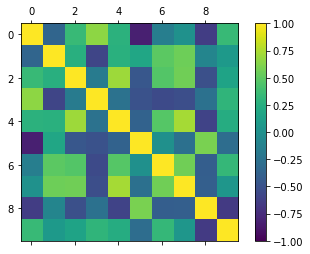

In [26]:
#Correlation Matrix
corr_matrix = hate_crime.corr()
print(corr_matrix)
#plotting correlation matrix
fig = pyplot.figure()
x1 = fig.add_subplot(111)
cx = x1.matshow(corr_matrix,vmin = -1,vmax = 1)
fig.colorbar(cx)
pyplot.show()

In [27]:
#Removing columns since they are highly correlated and we dont need them as it degrades the model
corr_hate_crime = hate_crime.drop(['share_white_poverty'], axis=1)
corr_hate_crime.describe()

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc
count,47.000,47.000,47.000,47.000,47.000,47.000,47.000,47.000,47.000
mean,54802.298,0.051,0.770,0.866,0.055,0.456,0.315,0.484,0.304
std,9255.117,0.010,0.169,0.034,0.031,0.021,0.150,0.113,0.253
min,35521.000,0.029,0.340,0.799,0.010,0.419,0.060,0.040,0.067
25%,47629.500,0.043,0.640,0.839,0.030,0.441,0.205,0.415,0.143
50%,54310.000,0.052,0.800,0.871,0.050,0.455,0.300,0.490,0.226
75%,60597.500,0.058,0.900,0.895,0.080,0.468,0.420,0.570,0.357
max,76165.000,0.073,1.000,0.915,0.130,0.532,0.630,0.690,1.522


In [28]:
#Identifying the nature of the data
corr_hate_crime.skew()

median_household_income                     0.237
share_unemployed_seasonal                   0.029
share_population_in_metro_areas            -0.708
share_population_with_high_school_degree   -0.284
share_non_citizen                           0.599
gini_index                                  0.985
share_non_white                             0.294
share_voters_voted_trump                   -1.192
hate_crimes_per_100k_splc                   2.821
dtype: float64

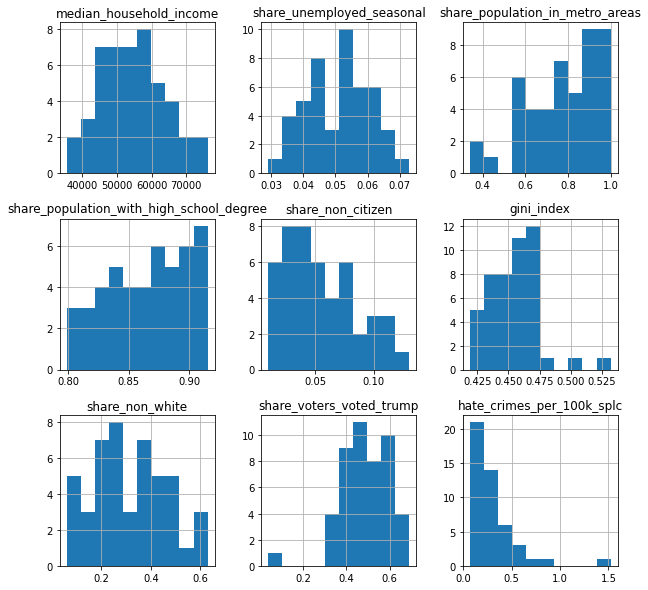

In [40]:
#Understanding the data is skew, Gaussian and exponential distribution and also to see any possible outliers 
histogram = corr_hate_crime.hist(figsize=(10, 10))
pyplot.show()

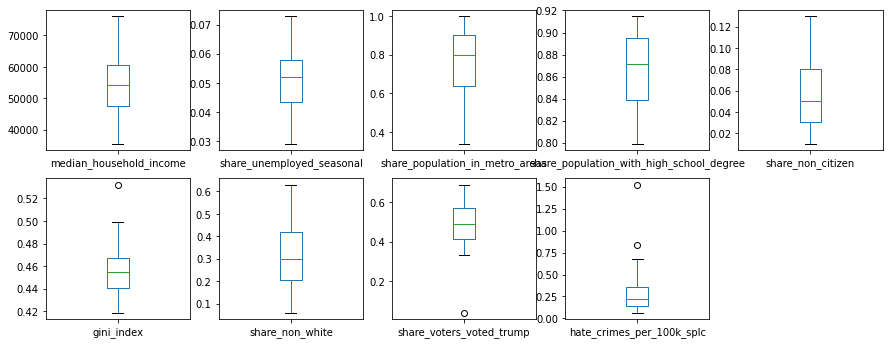

In [44]:
#Plotting Box and Whisker plot to review the distribution of each attribute.
#Boxplot Summarizes the distribution of each attribute , drawing a line for the median (Middle value) and box 
#around the 15th and 75th percentile gives an idea of data spread.
#Dots outside the whiskers show candidate outlier values 
corr_hate_crime.plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey =False,figsize=(15, 15));

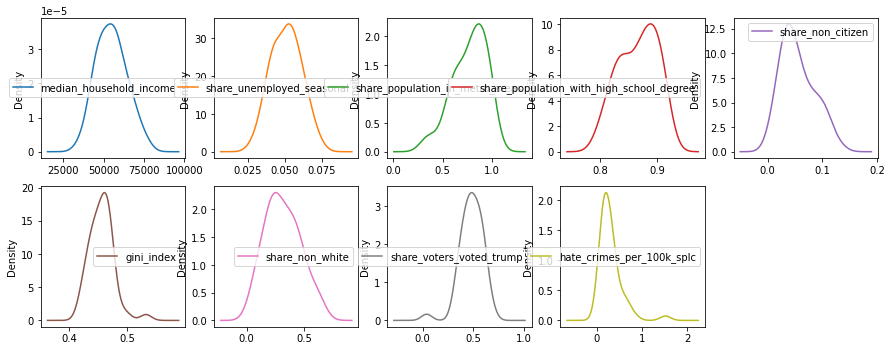

In [46]:
#Density plot (as they're better at determining the distribution shape because they're not affected 
#by the number of bins used). 
corr_hate_crime.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, sharey =False,figsize=(15, 15));

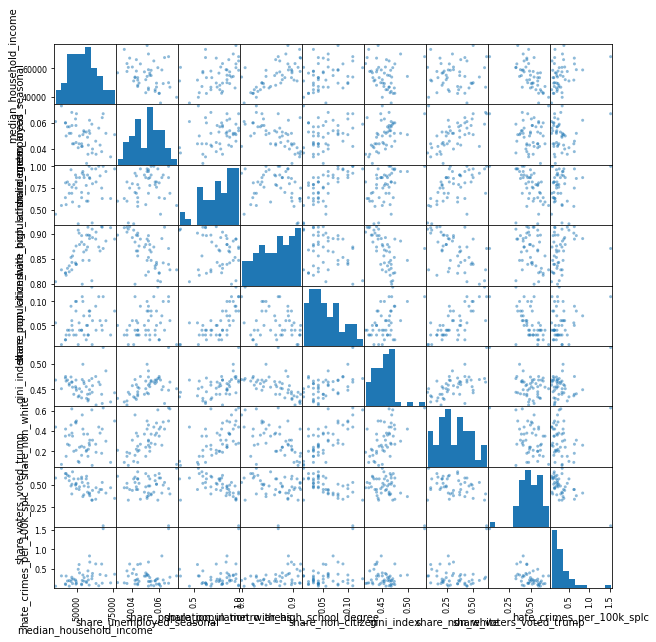

In [52]:
#Plotting scatter matrix
scatter_matrix(corr_hate_crime, figsize=(10, 10));

In [ ]:
corr_hate_crime.shape

(47, 10)

In [54]:
#Data preparations
features_hate_crime = corr_hate_crime.iloc[:,1:9]
label_hate_crime = corr_hate_crime.iloc[:,9]
print(label_hate_crime.head(5))

features_final = corr_hate_crime.values[:,1:9]
label_final = corr_hate_crime.values[:,9]

0    0.126
1    0.144
2    0.225
3    0.069
4    0.256
Name: hate_crimes_per_100k_splc, dtype: float64


In [57]:
#Rescaling data
scale = MinMaxScaler(feature_range=(0,2))
rescaled_features = scale.fit_transform(features_hate_crime)
set_printoptions(precision=3)
print(rescaled_features[0:5,:])

[[0.332 1.409 0.909 0.379 0.167 0.938 1.018 1.815]
 [1.58  1.591 0.879 1.983 0.5   0.053 1.263 1.508]
 [0.676 1.545 1.697 0.741 1.5   0.637 1.509 1.415]
 [0.463 1.045 1.061 0.431 0.5   0.69  0.702 1.723]
 [1.229 1.364 1.909 0.121 2.    0.92  1.93  0.892]]


In [58]:
#Standardizing data
scaler = StandardScaler()
stand_features = scaler.fit_transform(rescaled_features)
set_printoptions(precision = 3)
print(stand_features[0:10,:])

[[-1.368  0.92  -0.775 -1.352 -1.169  0.803  0.233  1.314]
 [ 1.401  1.322 -0.835  1.441 -0.507 -1.638  0.704  0.416]
 [-0.606  1.222  0.778 -0.722  1.478 -0.027  1.175  0.147]
 [-1.079  0.114 -0.477 -1.262 -0.507  0.119 -0.372  1.045]
 [ 0.621  0.819  1.196 -1.803  2.471  0.754  1.982 -1.379]
 [ 0.67  -1.095  0.181  0.81   0.154  0.071 -0.036 -0.392]
 [ 1.677  0.114  1.017  0.6    0.154  1.486 -0.103 -0.661]
 [ 0.297 -0.189  0.778  0.24  -0.176 -0.759  0.368 -0.571]
 [ 1.472  1.625  1.376  0.15   1.809  3.732  2.116 -3.983]
 [-0.946  0.114  1.137 -0.391  1.147  0.9    0.973  0.057]]


In [60]:
# Splitting the data and targets into training/testing sets
train_fet,test_fet,train_lab,test_lab = train_test_split(stand_features,label_hate_crime,test_size = 0.20,random_state = 35)


In [61]:
# Creating linear regression object
model_obj = LinearRegression()
# Train the model using the training sets
model_obj.fit(train_fet,train_lab)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# Make predictions using the testing set
res_values = model_obj.predict(test_fet)

In [ ]:
#Mean Square Error
error = mean_squared_error(test_lab,res_values)
print("The Mean Squared Error is {}".format(error))

The Mean Squared Error is 0.03175997712135166


In [ ]:
#Root Mean Square Error
rmse = sqrt(error)
print("The Root Mean Squarea Error is {}".format(rmse))

The Root Mean Squarea Error is 0.1782132910906245
